Problem 3: Python Code that creates an RBF Network

In [1]:
# Import the required libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Define a function to split the train and test data in to 80, 20 ratio
def split_data(data=None):
  train=80
  test=20
  rows, cols= data.shape
  train_index=int((train/100)*rows)
  train_data=data[:train_index]
  test_data=data[train_index:]
  return train_data, test_data

In [3]:
# Function to generate training set as given in the assignment
def training_set(i_range=21,j_range=21):
    res=list()
    data=np.array([[-2+0.2*i, -2+0.2*j] for i in range(i_range) for j in range(j_range)])
    for x in data:
      if x[0]**2+x[1]**2<=1:
        res.append([x[0],x[1],1])
      elif x[0]**2+x[1]**2>1:
        res.append([x[0],x[1],-1])
    
    return np.array(res)

In [4]:
# Print the training set generated
training_set()

array([[-2. , -2. , -1. ],
       [-2. , -1.8, -1. ],
       [-2. , -1.6, -1. ],
       ...,
       [ 2. ,  1.6, -1. ],
       [ 2. ,  1.8, -1. ],
       [ 2. ,  2. , -1. ]])

In [5]:
# Function to generate X,Y from a given dataset
def generate_X_Y(data):
  rows, columns = data.shape
  X = data[:rows, :-1]
  Y = data[:rows, -1]
  return X , Y

In [6]:
# Function to calculate accuracy
def calculate_acc(y, y_pred):
  acc=np.mean(y == y_pred)*100
  return acc

In [7]:
# Fucntion to calculate mean square error
def calculate_mean_sqr_error(y, y_pred):
  m=np.mean((y-y_pred)**2)
  return m

In [33]:
# Class that includes implemention of RBF Neural Network
class RBFNeuralNetwork:
  def __init__(self, spread=0):
    self._spread_method=spread
    self._centers=None
    self._weights=None
  
  def spread_getter(self):
    return self._spread_method
  
  def spread_setter(self,spread):
    self._spread_method=spread

  def centers_getter(self):
    return self._centers
  
  def centers_setter(self,centers):
    self._centers=centers
  
  def weights_getter(self):
    return self._weights
  
  def weights_setter(self, weights):
    self._weights=weights
    
  def fit(self, x, y, kmeans_param=False, random_center_param=False):
    if not random_center_param and not kmeans_param:
      self.centers_setter(x)
    else:
      if kmeans_param:
        kmeans_model=KMeans(n_clusters=150, random_state=0)
        self.centers_setter(kmeans_model.fit(x).cluster_centers_)
      else:
        self.centers_setter(x[np.random.choice(x.shape[0],150)])
    
    G=self.activation_func(x)
    self.weights_setter(np.dot(np.linalg.pinv(G),y))

  def predict(self, x):
    G=self.activation_func(x)
    return np.sign(np.dot(G, self.weights_getter()))

  # Gaussian  Kernel function. Here x is the input vector and center is the center of thr radial function

  def kernel(self, x, center):
    s=2*self.spread_getter()**2
    d=np.linalg.norm(x- center) ** 2
    r=np.exp(- d ** 2 / s)
    return r
    
  def activation_func(self, x):
    g=np.zeros((x.shape[0],self.centers_getter().shape[0]))
    for i in range(x.shape[0]):
      for j in range(self.centers_getter().shape[0]):
        g[i,j] = self.kernel(x[i], self.centers_getter()[j])
    return g


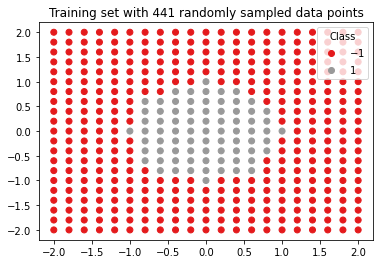

In [16]:
# Generating a pictorial representation of the training set with 441 randomly sampled data points 

training_data=training_set()

model_plot=plt.scatter(training_data[:,0],training_data[:,1], c=training_data[:,2], cmap='Set1')
plt.legend(*model_plot.legend_elements(), title="Class")
plt.title("Training set with 441 randomly sampled data points")
plt.show()

**Part 1:** Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all
the points in the training set as centers of the RB functions. Compare the performance results (mean square
error) as you vary the spread parameter while keeping it the same for all kernel functions

In [17]:
# Defining a range of constant sigmas
sigmas=[0.5,0.6,0.7,0.8,0.9,1,3,5,7,9,11,13,15,17,19,21]

# RBF Neural Network
rbfNeuralNetwork = RBFNeuralNetwork()

# Dictionary to store the accuracy values and mean square error of the model
acc_dict ={
    "train_acc": list(),
    "test_acc": list(),
    "error": list()
}

for s in sigmas:
  rbfNeuralNetwork.spread_setter(s)
  np.random.shuffle(training_data)
  train_data, test_data =split_data(training_data)

  X_train, Y_train = generate_X_Y(train_data)
  X_test, Y_test = generate_X_Y(test_data)

  rbfNeuralNetwork.fit(X_train, Y_train)
  pred=rbfNeuralNetwork.predict(X_train)
  acc_dict["train_acc"].append(calculate_acc(X_train, pred))

  pred=rbfNeuralNetwork.predict(X_test)
  acc_dict["test_acc"].append(calculate_acc(Y_test, pred))
  acc_dict["error"].append(calculate_mean_sqr_error(Y_test, pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


The lowest mean square error is 0.0449438202247191


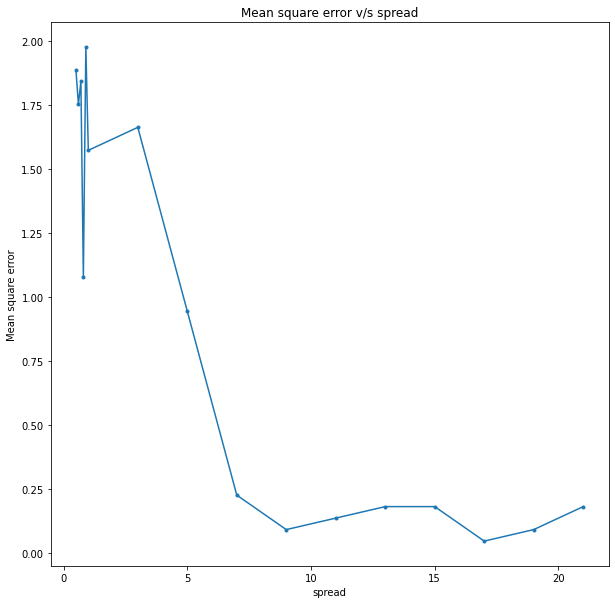

In [20]:
figure, img1 = plt.subplots(figsize = (10,10))
img1.set_title("Mean square error v/s spread")
img1.plot(sigmas, acc_dict["error"],marker='.',)
img1.set_xlabel("spread")
img1.set_ylabel("Mean square error")
 
print("The lowest mean square error is {0}".format(min(acc_dict["error"])))
plt.show()

The Maximum accuracy is 98.87640449438202


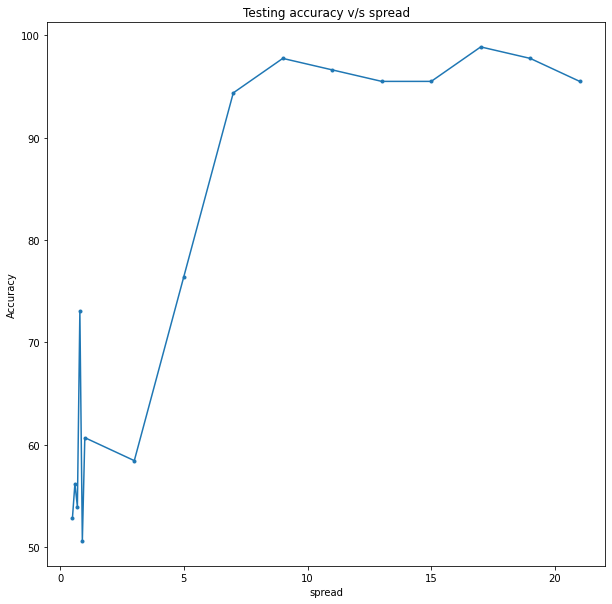

In [19]:
figure, img2 = plt.subplots(figsize = (10,10))
img2.set_title("Testing accuracy v/s spread")
img2.plot(sigmas, acc_dict["test_acc"],marker='.',)
img2.set_xlabel("spread")
img2.set_ylabel("Accuracy")

print("The Maximum accuracy is {0}".format(max(acc_dict["test_acc"])))
plt.show()

Comparing both these plot images we can say that the maximum accuracy which is 98.8% is achieved when the spread is 17. Also, at that spread value, the mean square error is the lowest which is 0.044. Thus, we can conclude that mean sqaure error vallue changes as the spread changes. 

Also, when the spread values are largely spaced then then the data points are described very well. However, if we keep increasing the spread parameters then then different centers of the kernel functions would overlap. This would results in increasing the mean square error value.

**Part 2:** Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:

a) Randomly select the centers from the input data.

In [27]:
# RBF Neural Network
rbf_part2_a=RBFNeuralNetwork()

# Set the spread value to 15
rbf_part2_a.spread_setter(15)
data_part2_a=training_set()
np.random.shuffle(data_part2_a)

# Split the data
train_data_part2_a, test_data_part2_a = split_data(data_part2_a)

# Get X_train, X_test, Y_train, Y_test
X_train, Y_train = generate_X_Y(train_data_part2_a)
X_test, Y_test = generate_X_Y(test_data_part2_a)

# Fit the model and calculate accuracy
rbf_part2_a.fit(X_train, Y_train, kmeans_param = False, random_center_param = True)
pred_part2_a=rbf_part2_a.predict(X_train)
part2_a_acc_train=calculate_acc(Y_train, pred_part2_a)

pred_part2_a=rbf_part2_a.predict(X_test)
part2_a_acc_test=calculate_acc(Y_test, pred_part2_a)
part2_a_random_error=calculate_mean_sqr_error(Y_test,pred_part2_a)

print("For Random center selection model the Accuracy is {0} and mean squared error is {1} ".format(part2_a_acc_test,part2_a_random_error))

For Random center selection model the Accuracy is 96.62921348314607 and mean squared error is 0.1348314606741573 


**Part 2:** b) Use K-Means algorithm to find the centers.

In [34]:
# RBF Neural Network
rbf_part2_b=RBFNeuralNetwork()

# Set the spread value to 15
rbf_part2_b.spread_setter(15)
data_part2_b=training_set()
np.random.shuffle(data_part2_b)

# Split the data
train_data_part2_b, test_data_part2_b = split_data(data_part2_b)

# Get X_train, X_test, Y_train, Y_test
X_train, Y_train = generate_X_Y(train_data_part2_b)
X_test, Y_test = generate_X_Y(test_data_part2_b)

# Fit the model and calculate accuracy
rbf_part2_b.fit(X_train, Y_train, kmeans_param = True, random_center_param = True)
pred_part2_b=rbf_part2_b.predict(X_train)
part2_b_acc_train=calculate_acc(Y_train, pred_part2_b)

pred_part2_b=rbf_part2_b.predict(X_test)
part2_b_acc_test=calculate_acc(Y_test, pred_part2_b)
part2_b_random_error=calculate_mean_sqr_error(Y_test,pred_part2_b)

print("For KMeans model the Accuracy is {0} and mean squared error is {1} ".format(part2_b_acc_test,part2_b_random_error))

For KMeans model the Accuracy is 98.87640449438202 and mean squared error is 0.0449438202247191 


**Conclusion:**  From the above accuracy results we can see that random selection model (Accuracy: 98.8%) performs better than the model prepared in part B_a (Accuracy: 96.6%).

Also, if we find the centers by using KMeans algorithm then the RBF model performs well (Accuracy: 98.8%).

So, we can say that random selection model and KMeans model are able to define boundaries very well and these models are least affected by the sigma values. However, considering all the input data as centers, the range of sigma values played an important role.